# A Complete Guide to Matrix Notation and Linear Regression

Let's really understand matrix notation in context of linear regression, from the ground up.

Linear Regression finds the best line, or *hyperplane* $\hat{y}$ in higher dimension, or generally a function $f$:

$$ \hat{y} = f(x) = wx $$

that fits the whole data. This is just a dot product between vector $w$ and a data point $x$ in $d$ dimension: 

$$ \hat{y} = w_0 + w_1x_1 + w_2x_2 + ... + w_dx_d $$ 

Notice that we use $w_0$ as an intercept term, and thus we need to add a dummy dimension with value of "1" ($x_0$) for all data points $x$. Thus, $x$ here is on $d+1$ dimension. Think of it as the y-intercept term $c$ in 2-dimension ($y = mx + c$).

Another way to look at this is that $f(x)$ transforms a data point $x$ on $d+1$ dimension into a predicted scalar value $\hat{y}$ that is close to target $y$:

$$
\begin{bmatrix}
x_0 \\
x_1 \\
\vdots \\
x_d 
\end{bmatrix}
\xrightarrow{f}
\hat{y}
\approx y
$$

## The Sum of Squared Error Loss

The best way to solve this is to find $w$ that minimizes the **sum of squared errors (SSE)**$^\dagger$, or the "error" between all of predicted value $\hat{y}^i$ and the target $y^i$ of $i^{th}$ data point for $i = 1$ to $n$, writing this as a loss function $L(w)$:

$$ 
L(w) = \sum_{i=1}^{n} \left( y^i - \hat{y}^i \right)^2 = \sum_{i=1}^{n} \left( y^i - wx^i \right)^2
$$

From now on we refer to a data point (d+1 vector) as $x^i$ and target (scalar) as $y^i$.

*$^\dagger$ Surprisingly, the SSE loss is not from someone's intuition, but it's systematically derived from the assumption that there is Gaussian noise with our observation of the underlying linear relationship.*


### How to Find the Optimal Solution
An optimal solution ($w$) for this equation can be found either using *closed-form solution* or via iterative methods like gradient descent. 

**A closed-form solution** means we figure out the formula for $w = ...$. Implementing that formula in a program directly solves the problem. The thing is you have to come up with the correct one yourself, by hand. 

Do you remember how to find a minimum (or maximum) value for a function? We take the derivative of the function above with respect to $w$, set it to zero, and solve for the $w$ in terms of other parameters. This is like taking a single jump to the optimal value. We do all the hard work for computers. 

Luckily we can do this for linear regression, but not all loss functions be solved this way, actually, only a few. In those cases, we use **iterative methods like gradient descent** to search for the solution. In contrast to closed-form solution, we do not jump directly to the optimal answer, instead, we take many steps that lead us near to where the optimal answer lives.


Next let's derive the closed-form solution for linear regression. In order to do that efficiently, we need some matrix notations.


## Going into Matrix Notation
Writing things down in matrix notation makes things much faster in NumPy. **But it's not easy to read matrix notation, especially if you study machine learning on your own.** There're things like dot product, matrix multiplication, transpose and stuff that you need to keep track of in your head. If you're starting out, then please write them on papers, drawing figures as needed to make you understand. It really pays off.

On top of that, these few **key standards** will make our lives with linear algebra easier:

### 1. Always a *column* vector

When you see standalone vectors in a matrix notation formula, assumes it's a column vector. E.g., 

$$x = 
\begin{bmatrix}
1 \\
2 \\
3 \\
\end{bmatrix}
$$

and so its transpose is a row vector, 

$$x^T = 
\begin{bmatrix}
1 & 2 & 3
\end{bmatrix}
$$ 

Likewise, you should try to make the final result of matrix operation to be a column vector.

Note that the NumPy vector created by `np.zeros`, `np.arange`, etc., is not really a column vector. It has only one dimension `(N,)`. So, you cannot transpose it directly (`x.T` still gives you `x`.) To convert it to a column vector, we use `x.reshape(N,1)` or `x[:, None]`.

### 2. Feature matrix $X$ is rows of data points
Our data points $x^i$ are on $d+1$ dimension, and there is $n$ of them, we store them all in a 2-d matrix $X$:

$$
X = \begin{align}
\underset{n\times d}
{\begin{bmatrix}
\longleftarrow & x^1 & \longrightarrow \\
\longleftarrow & x^2 & \longrightarrow \\
& \vdots & \\
\longleftarrow & x^n & \longrightarrow \\
\end{bmatrix}}
\end{align}
$$

Each row in $X$ is a row vector for each data point. Also note that we use uppercase letter for matrix.

#### 3. Again, $w$ is a column vector
Like the first point, our $w$ will be $d+1$ dimension column vector with w_0 as an intercept term:
$$
w = 
\begin{bmatrix}
w_0 \\
w_1 \\
\vdots \\
w_d 
\end{bmatrix}
$$

### 4. Dot products of rows in matrix $X$ with vector $w$ is $Xw$
Sometimes we want the dot product of each row in matrix with a vector:
$$
Xw = \underset{n\times (d+1)}
{
    \begin{bmatrix}
    \longleftarrow & x^1 & \longrightarrow \\
    \longleftarrow & x^2 & \longrightarrow \\
    & \vdots & \\
    \longleftarrow & x^n & \longrightarrow \\
    \end{bmatrix}
}
\underset{(d+1) \times 1}
{
    \begin{bmatrix}
    \uparrow \\
    w \\
    \downarrow
    \end{bmatrix}
}
=
\begin{bmatrix}
x^1w \\
x^2w \\
\vdots \\
x^nw
\end{bmatrix} 
$$

given that $X$ contains rows of vectors we want to dot product with. 

Interestingly, this gives us a column vector of our predictions $\hat{y}$:

$$
\begin{bmatrix}
x^1w \\
x^2w \\
\vdots \\
x^nw
\end{bmatrix} =
\begin{bmatrix}
\hat{y}^1 \\
\hat{y}^2 \\
\vdots \\
\hat{y}^n \\
\end{bmatrix} = \hat{y}
$$

It's also good to remind yourself that it sums along dimension of $x^i$ and $w$:
$$
Xw =
\begin{bmatrix}
\sum_{j=0}^{d} x_j^1w_j \\
\sum_{j=0}^{d} x_j^2w_j \\
\vdots \\
\sum_{j=0}^{d} x_j^nw_j \\
\end{bmatrix} 
$$

### 5. Sum of Squared  is $x^Tx$

This is a useful pattern to memorize. Sometimes we want the sum of squared of each element in arbitrary d-dimension vector $x$:

$$
\sum_{j=1}^{d} x_i^2
$$

which is simply $x^Tx$:

$$
x^Tx = 
\begin{bmatrix}
x_1 & ... & x_d
\end{bmatrix}
\begin{bmatrix}
x_1 \\
\vdots \\
x_d 
\end{bmatrix}
= \sum_{j=1}^{d} x_i^2
$$

Notice that the result of $x^Tx$ is scalar, e.g., a number. 

In fancy term, ${\left\lVert x \right\rVert} = \sqrt{\sum_{j=1}^{d} x_i^2}$ is L2-norm (or Euclidean norm) of $x$. So we can write sum of squared as ${\left\lVert x \right\rVert}^2 = \sum_{j=1}^{d} x_i^2$. For now, let's not care what norm actually means.

### Writing SSE Loss in Matrix Notation

Now you're ready, let's write the above SSE loss function in matrix notation. If you look at $L(w)$ closely, it's a sum of squared of vector $y - \hat{y}$. This means we can kick-off by applying our fourth trick:

$$
L(w) = {\left\lVert y - \hat{y} \right\rVert}^2
$$

Next we just have to find $y - \hat{y}$. First we encode target $y$ in a long column vector of shape `[n, 1]`:

$$
y = 
\begin{bmatrix}
y^1 \\
y^2 \\
\vdots \\
y^n 
\end{bmatrix}
$$

(Remember that we use superscript for indexing the $i^{th}$ data point.) 

Next we encode each of our predicted values ($\hat{y}^i$) in a column vector $\hat{y}$. Since $\hat{y}^i$ is a dot product between $w$ and each of $x^i$, we can apply [4](#4.-Dot-products-of-rows-in-matrix-$X$-with-vector-$w$-is-$Xw$):

$$
\begin{align}
y - \hat{y} &= 
\begin{bmatrix}
y^1 \\
y^2 \\
\vdots \\
y^n 
\end{bmatrix}
- \begin{bmatrix}
\hat{y}^1 \\
\hat{y}^2 \\
\vdots \\
\hat{y}^n 
\end{bmatrix} && \text{(Error between target and predicted)} \\ &=
\begin{bmatrix}
y^1 \\
y^2 \\
\vdots \\
y^n 
\end{bmatrix}
- \begin{bmatrix}
x^1w \\
x^2w \\
\vdots \\
x^nw
\end{bmatrix} 
&& \text{(Predicted is a dot product of $w$ and each of data point $x^i$)} \\ &=
\underset{n\times 1}
{
    \begin{bmatrix}
    y^1 \\
    y^2 \\
    \vdots \\
    y^n 
    \end{bmatrix}
}
- \underset{n\times (d+1)}
{
    \begin{bmatrix}
    \longleftarrow & x^1 & \longrightarrow \\
    \longleftarrow & x^2 & \longrightarrow \\
    & \vdots & \\
    \longleftarrow & x^n & \longrightarrow \\
    \end{bmatrix}
}
\underset{(d+1)\times 1}
{
    \begin{bmatrix}
    \uparrow \\
    w \\
    \downarrow
    \end{bmatrix}
} && \text{(Separate them out)} \\ &=
y - Xw && \text{(Encode in matrix/vector form)}
\end{align}
$$

Putting all together we get our loss function for linear regression:

$$
L(w) = {\left\lVert y - Xw \right\rVert}^2
$$

In NumPy code, we can compute $L(w) = (y - Xw)^T(y - Xw)$.

There's no intuitive way to come up with this nice formula the first time you saw it. You have to work it out and put things together yourself. Then you'll start to memorize the pattern and it'll become easier.

## Deriving a Closed-form Solution

We'll take derivative of $L(w)$ with respect to $w$, set to zero and solve for $w$.

Writing matrix notation is already hard, taking derivative of it is even harder. I recommend writing out partial derivatives to see what happens. For $L(w) = L_w$, we have to take derivative with respect to each dimension of $w$:

$$
\nabla L_w = 
\begin{bmatrix}
\frac{\partial L}{\partial w_0} \\
\frac{\partial L}{\partial w_1} \\
\vdots \\
\frac{\partial L}{\partial w_d} \\
\end{bmatrix} 
=
\begin{bmatrix}
\frac{\partial \sum_{i=1}^{n} \left( y^i - wx^i \right)^2}{\partial w_0} \\
\frac{\partial \sum_{i=1}^{n} \left( y^i - wx^i \right)^2}{\partial w_1} \\
\vdots \\
\frac{\partial \sum_{i=1}^{n} \left( y^i - wx^i \right)^2}{\partial w_d}
\end{bmatrix} 
=
\begin{bmatrix}
\frac{\partial \sum_{i=1}^{n} \left( y^i - wx^i \right)^2}{\partial w_0} \\
\frac{\partial \sum_{i=1}^{n} \left( y^i - wx^i \right)^2}{\partial w_1} \\
\vdots \\
\frac{\partial \sum_{i=1}^{n} \left( y^i - wx^i \right)^2}{\partial w_d}
\end{bmatrix} 
=
\underset{(d+1) \times 1}
{
\begin{bmatrix}
-2\sum_{i=1}^{n} x^i_0 \left( y^i - wx^i \right) \\
-2\sum_{i=1}^{n} x^i_1 \left( y^i - wx^i \right) \\
\vdots \\
-2\sum_{i=1}^{n} x^i_d \left( y^i - wx^i \right) \\
\end{bmatrix}
}
$$

Looks like we might be able to apply our fourth point ($Xw$, but in this case $w$ is $(y - Xw)$. But unlike our fourth point, we now sum along data points ($n$) instead of dimensions ($d$). For this, we want each row of $X$ to be one given dimension along all data points instead of one data point with all dimensions, and thus we use $X^T$ instead of $X$. Finally, here's the full derivative in matrix notation:

$$
\nabla L_w = -2X^T(y-Xw)
$$

Setting to zero and solve:

$$
\begin{align}
0 &= -2X^T(y-Xw) \\
&= X^T(y-Xw)     \\ 
&= X^Ty - X^TXw 
\end{align}
$$

Move $X^TX$ to other side and we get a closed-form solution:

$$
\begin{align}
X^TXw &= X^Ty    \\
w &= (X^TX)^{-1}X^Ty
\end{align}
$$

In NumPy, this is:
```python
w = np.linalg.inv(X.T @ X) @ X @ y
```

## A NumPy Example

In [379]:
import numpy as np
import matplotlib.pyplot as plt

We will create a fake dataset from the underlying equation $y = 2x + 7$:

In [380]:
def true_target(x):
  return 2*x + 7

In practical settings, there is no way we know this exact equation. We only get **observed** targets, and there's some **noise** on it. The reason is that it's impossible to measure any data out there in the world perfectly:

In [381]:
def observed_target(x):
  """Underlying data with Gaussian noise added"""
  normal_noise = np.random.normal() * 8
  return true_target(x) + normal_noise

Next, make 50 data points, observations and targets:

In [382]:
N = 50

# Features, X is [1,50]
X = np.arange(N).reshape(N, 1)

# Observed targets
y = np.array([observed_target(x) for x in X]).reshape(N, 1)

Adding dummy dimension term to each $x^i$:

In [383]:
# Append 1 for intercept term later
X = np.hstack([np.ones((N, 1)), X])

Note that it **doesn't matter** here whether we add it to the front or back, it will simply reflect correspondingly in our solution $w$.

Visualize the data:

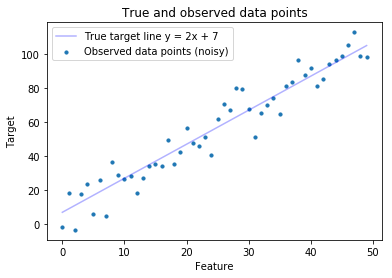

In [384]:
# For plotting
features = X[:,1:] # exclude the intercept for plotting
target = y
true_targets = true_target(X[:,1:])

plt.scatter(features, target, s=10, label='Observed data points (noisy)')
plt.plot(features, true_targets, c='blue', label='True target line y = 2x + 7', alpha=0.3)

plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend(loc='best')
plt.title('True and observed data points')
plt.show()

Our goal is to get the line that is closest to the true target line as possible. For this we use linear regression with our closed-form solution:

In [385]:
w = np.linalg.inv(X.T @ X) @ X.T @ y

To predict, we compute $\hat{y} = xw$ for each data point $x^i$:

In [386]:
predicted = X @ w # y_hat

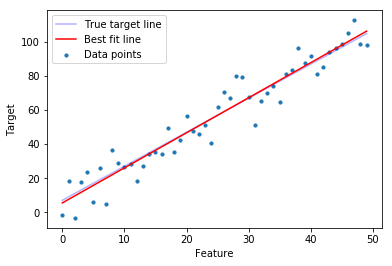

In [387]:
plt.scatter(features, target, s=10, label='Data points')
plt.plot(features, true_targets, c='blue', label='True target line', alpha=0.3)
plt.plot(features, predicted, c='red', label='Best fit line')

plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend(loc='best')
plt.show()

That's pretty close. Let see our SSE loss for this line:

In [388]:
sse_loss = np.linalg.norm(y - X@w, ord=2) ** 2 # Use L-2 norm from np.linalg, or do (y - X@w).T @ (y - X@w)
print("Sum of squared error is", sse_loss)

Sum of squared error is 3497.7181778737386


And our $w$ is:

In [389]:
print(w)

[[5.46457445]
 [2.0602139 ]]


Since we append ones in front of each data point $x$, `w[0]` will be the intercept term and `w[1]` will be the slope. Recall the true equation $y = 2x + 7$, you can see that we almost got the true slope (2):

In [390]:
print(w[1][0])

2.060213901971743


The intercept seems a little off, but that's okay because our data is in a big range ($x \in [0, 50], y \in [7, 107]$). If we normalize the data into $[0, 1]$ range, expect it to be much closer.